#          **Customer Churn Prediction**
Our goal is to analyze customer data, preprocess it, select the most important features, and apply various machine learning models to predict whether a customer is likely to churn (leave the company). After training multiple classification models, the best-performing model will be selected based on evaluation metrics.

**The notebook follows these key steps:**

Data Loading & Exploration – Understanding the dataset structure and key variables.
Data Preprocessing – Handling missing values, encoding categorical variables, and scaling numerical features.
Feature Selection – Identifying and selecting the most relevant features to improve model performance.
Model Training & Hyperparameter Tuning – Applying multiple machine learning models such as Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, and XGBoost. Using GridSearchCV to find the optimal hyperparameters.
Model Evaluation – Comparing models using accuracy, precision, recall, F1-score, and confusion matrices.
Selecting the Best Model – The best model will be chosen based on cross-validation accuracy and test performance.
About the Dataset
The dataset used in this project is the Telco Customer Churn Dataset, available on Kaggle at https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset/data. Telco is a fictional company that provided home phone and Internet services to 7043 customers in California in Q3.

We have 7043 observations with 33 variables.

# **Variables**
**CustomerID:** A unique ID that identifies each customer.

**Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

**Country:** The country of the customer’s primary residence.

**State: **The state of the customer’s primary residence.

**City:** The city of the customer’s primary residence.

**Zip Code:** The zip code of the customer’s primary residence.

**Lat Long: **The combined latitude and longitude of the customer’s primary residence.

**Latitude:** The latitude of the customer’s primary residence.

**Longitude:** The longitude of the customer’s primary residence.

**Gender:** The customer’s gender: Male, Female

**Senior Citizen:** Indicates if the customer is 65 or older: Yes, No

**Partner:** Indicate if the customer has a partner: Yes, No

**Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn Label:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

**Churn Value:** 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

**Churn Score:** A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

**CLTV:** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

**Churn Reason:** A customer’s specific reason for leaving the company. Directly related to Churn Category.

**Target Variable**
Churn Value: Based on past customer data, we aim to predict whether a customer has churned (left the company) or remained.

This is a binary classification problem, where machine learning models will be trained to identify patterns in customer behavior and predict churn likelihood.

# **Import Libraries**

In [3]:
# Data manipulation
import pandas as pd  # For handling dataframes
import numpy as np  # For numerical computations

# Data visualization
import seaborn as sns  # For creating statistical plots
import matplotlib.pyplot as plt  # For plotting graphs

# Data preprocessing
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Handling imbalanced data (majority vs minority in classification)
from imblearn.over_sampling import SMOTE  # For oversampling minority classes

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif  # For selecting top k best features

# Dimensionality reduction
from sklearn.decomposition import PCA

# Model selection & evaluation
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test sets
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
from sklearn.model_selection import cross_val_score  # For cross-validation scoring

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble models
from xgboost import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Pipelines
from sklearn.pipeline import Pipeline  # For creating machine learning pipelines

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# **Loading the Dataset**

In [4]:
df = pd.read_excel("Telco_churn.xlsx")
print(df.isnull().sum())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


**# DataFrame Overview and Initial Inspection #**

In [5]:

# Display information about the DataFrame including data types,
# non-null values, and memory usage
print(df.info())

# Generate and display summary statistics for numerical columns
print(df.describe())

# Display the first 5 rows of the DataFrame to get a quick preview of the data
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
# How many unique values are there for each feature
df.apply(lambda x: len(x.unique()))

,0
CustomerID,7043
Count,1
Country,1
State,1
City,1129
Zip Code,1652
Lat Long,1652
Latitude,1652
Longitude,1651
Gender,2


# **Dropping Unnecessary Columns**
**Columns with only one unique value** are dropped because they do not provide any useful information for prediction.

**CustomerID** is dropped since it is unique for each customer and does not contribute to churn prediction.

We are also dropping **Churn Reason** beacuse it can make our model bias as when 'Churn Reason' is NaN, the 'Churn Value' is always 0.

In [7]:
for col in df.columns:
   if len(df[col].unique()) == 1:
        df.drop(col, axis=1, inplace=True)
df.drop(["CustomerID", "Churn Label","Churn Reason"] , axis=1, inplace=True)




# **Categorical Encoding & Data Type Conversion**
We encode categorical variables such as Gender, Internet Service, and Payment Method using Label Encoding, converting them into numerical form. Additionally, the Total Charges column, initially stored as a string or object type, is converted to numeric using pd.to_numeric() to ensure compatibility with model training. Finally, we verify the changes using df.info() to confirm that all categorical columns are encoded as integers and Total Charges is properly converted.

# **Handling Missing Values in Total Charges**

From df.info(), we identified missing values in Total Charges, possibly due to blank strings. We fill missing values using the column mean.

In [8]:



categorical_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
                       'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
                       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                       'Contract', 'Paperless Billing', 'Payment Method',
                       'City']


label_encoder = LabelEncoder()

# Encode categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df['Total Charges'] = df['Total Charges'].astype(str).str.strip()
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Check the dtypes to confirm the conversion
mean_value = df['Total Charges'].mean()
df['Total Charges'].fillna(mean_value, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   int64  
 1   Zip Code           7043 non-null   int64  
 2   Lat Long           7043 non-null   object 
 3   Latitude           7043 non-null   float64
 4   Longitude          7043 non-null   float64
 5   Gender             7043 non-null   int64  
 6   Senior Citizen     7043 non-null   int64  
 7   Partner            7043 non-null   int64  
 8   Dependents         7043 non-null   int64  
 9   Tenure Months      7043 non-null   int64  
 10  Phone Service      7043 non-null   int64  
 11  Multiple Lines     7043 non-null   int64  
 12  Internet Service   7043 non-null   int64  
 13  Online Security    7043 non-null   int64  
 14  Online Backup      7043 non-null   int64  
 15  Device Protection  7043 non-null   int64  
 16  Tech Support       7043 

In [9]:


df[['Latitude', 'Longitude']] = df['Lat Long'].str.split(',', expand=True)

df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

df = df.drop('Lat Long', axis=1)


print(df[['Latitude', 'Longitude']].head())

    Latitude   Longitude
0  33.964131 -118.272783
1  34.059281 -118.307420
2  34.048013 -118.293953
3  34.062125 -118.315709
4  34.039224 -118.266293


In [10]:
df.corr()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
City,1.000000,0.004552,-0.027111,-0.015189,0.010222,-0.010790,0.024217,0.000849,0.021627,0.002900,...,0.016033,0.017163,0.011248,0.007985,-0.014919,0.009145,0.020917,0.008160,0.003312,-0.006918
Zip Code,0.004552,1.000000,0.895743,-0.784271,0.015493,-0.006635,-0.006503,0.008597,0.001041,-0.005295,...,0.010505,0.009192,0.004381,-0.011765,-0.002293,-0.004596,-0.001461,0.003346,-0.002769,-0.003562
Latitude,-0.027111,0.895743,1.000000,-0.876779,0.008592,-0.010428,-0.007996,0.017550,-0.001631,-0.013491,...,0.009752,0.006722,0.004799,-0.018510,0.004293,-0.019899,-0.010307,-0.003384,-0.007684,0.000886
Longitude,-0.015189,-0.784271,-0.876779,1.000000,-0.009824,0.008812,0.008032,-0.013813,-0.001678,0.014069,...,-0.001371,-0.012754,-0.011633,0.021565,-0.000103,0.024098,0.009039,0.004594,0.004260,0.000485
Gender,0.010222,0.015493,0.008592,-0.009824,1.000000,-0.001874,-0.001808,0.005229,0.005106,-0.006488,...,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612,0.000311,-0.006851
Senior Citizen,-0.010790,-0.006635,-0.010428,0.008812,-0.001874,1.000000,0.016479,-0.174396,0.016567,0.008576,...,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889,0.102181,-0.003167
Partner,0.024217,-0.006503,-0.007996,0.008032,-0.001808,0.016479,1.000000,0.363430,0.379697,0.017706,...,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448,-0.111013,0.137859
Dependents,0.000849,0.008597,0.017550,-0.013813,0.005229,-0.174396,0.363430,1.000000,0.131376,0.000625,...,0.016671,-0.000669,0.202279,-0.118963,-0.025370,-0.144206,0.032128,-0.248542,-0.174950,0.058222
Tenure Months,0.021627,0.001041,-0.001631,-0.001678,0.005106,0.016567,0.379697,0.131376,1.000000,0.008448,...,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229,-0.224987,0.396406
Phone Service,0.002900,-0.005295,-0.013491,0.014069,-0.006488,0.008576,0.017706,0.000625,0.008448,1.000000,...,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942,0.024136,0.023015


# **Correlation Heatmap**
Now that all columns are numeric, we want to understand relationships between numerical features and Churn Value. We generate a correlation heatmap using seaborn.heatmap().

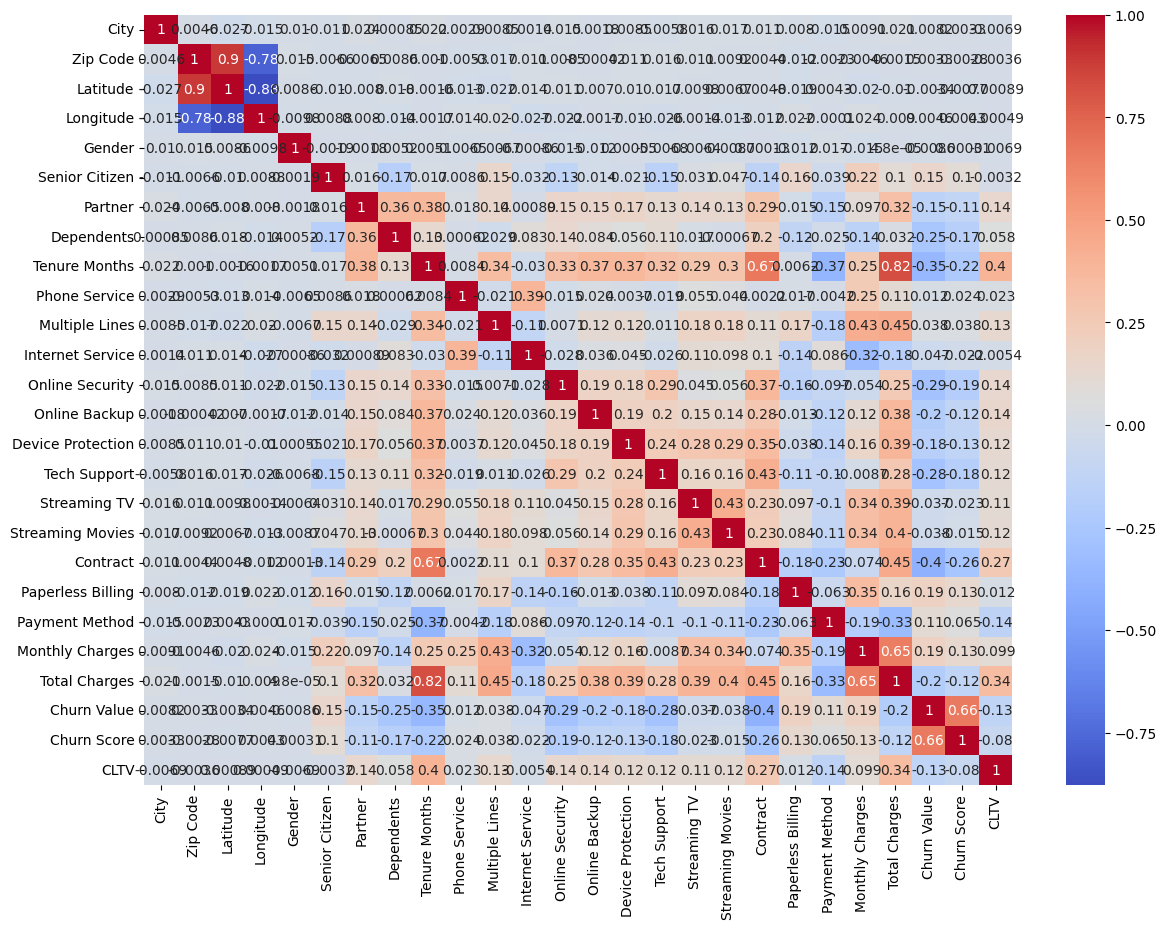

In [11]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Checking Class Imbalance**
From df["Churn Value"].value_counts(), we observe the distribution of churned (1) vs. non-churned (0) customers.
If the classes are highly imbalanced, the model may become biased toward the majority class, leading to poor predictions for the minority class.

In [12]:
df['Churn Value'].value_counts()

,count
Churn Value,
0,5174
1,1869


# **Handling Class Imbalance Using SMOTE**
To address imbalanced dataset, we split the data into 80% training and 20% testing while maintaining class proportions using stratify=y. Since under-sampling the majority class may lead to data loss, we apply SMOTE (Synthetic Minority Over-sampling Technique) only to the training data, preventing data leakage. SMOTE generates synthetic samples for the minority class (Churn = 1) while keeping the majority class unchanged, ensuring a balanced dataset. Finally, we verify the class distribution before and after resampling using y_train.value_counts() and pd.Series(y_train_resampled).value_counts() to confirm that SMOTE has successfully balanced the dataset.

In [13]:



X = df.drop(columns=['Churn Value'])
y = df['Churn Value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", pd.Series(y_train_resampled).value_counts())



Original class distribution:
 Churn Value
0    4139
1    1495
Name: count, dtype: int64
Resampled class distribution:
 Churn Value
0    4139
1    4139
Name: count, dtype: int64


# **Feature Scaling Using StandardScaler**
To ensure that all features are on a similar scale and to improve model performance, we apply Standard Scaling using StandardScaler(). This process standardizes the features by normalization, preventing any feature with larger values from dominating those with smaller values. First, we initialize the scaler with StandardScaler(), then fit and transform the resampled training data so that it is properly scaled. We apply the same transformation to the test data to maintain consistency across datasets. Finally, we verify that the scaling is correct by printing the shapes of X_train_scaled and X_test_scaled, ensuring they match the expected dimensions.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)

X_test_scaled = scaler.transform(X_test)


print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled test data shape:", X_test_scaled.shape)

Scaled training data shape: (8278, 25)
Scaled test data shape: (1409, 25)


"""

# **# Model Selection and Hyperparameter Tuning with GridSearchCV for ML Models**

This script performs hyperparameter tuning and model selection using
GridSearchCV for various classification models.

The pipeline involves:
1. Feature selection using SelectKBest with ANOVA F-value (f_classif).
2. Hyperparameter tuning using GridSearchCV with cross-validation.
3. Evaluation of model performance on training and test datasets.
4. Storing results such as best parameters, accuracy, classification report,
   and confusion matrix for each model.

Models included:
- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest
- Gradient Boosting
- XGBoost
"""


In [15]:

models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

# Define parameter grids for each model
param_grids = {
    "KNN": {
        'selectkbest__k': [5, 10, 15, 20],
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance']
    },
    "Decision Tree": {
        'selectkbest__k': [5, 10, 15, 20],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'selectkbest__k': [5, 10, 15, 20],
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20]
    },
    "Gradient Boosting": {
        'selectkbest__k': [5, 10, 15, 20],
        'clf__n_estimators': [50, 100, 200],
        'clf__learning_rate': [0.01, 0.1, 0.2]
    },
    "XGBoost": {
        'selectkbest__k': [5, 10, 15, 20],
        'clf__n_estimators': [50, 100, 200],
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__max_depth': [3, 5, 7]
    }
}

results = {}

for name, model in models.items():
    print(f"--- Model: {name} ---")

    # Create the pipeline
    pipeline_model = Pipeline([
        ('selectkbest', SelectKBest(score_func=f_classif)),
        ('clf', model)
    ])

    # Create GridSearchCV object
    grid_search = GridSearchCV(
        pipeline_model,
        param_grids[name],
        cv=3,
        scoring='accuracy',
        n_jobs=-1,  # Use all available cores
        verbose=1
    )

    # Fit the GridSearchCV
    grid_search.fit(X_train_scaled, y_train_resampled)

    # Get the best model
    best_model = grid_search.best_estimator_

    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", np.round(grid_search.best_score_, 5))

    # Evaluate on training and test data
    y_train_pred = best_model.predict(X_train_scaled)
    train_acc = accuracy_score(y_train_resampled, y_train_pred)
    print("Training Accuracy:", np.round(train_acc, 5))

    y_test_pred = best_model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, y_test_pred)
    print("Test Accuracy:", np.round(test_acc, 5))

    print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("\n" + "="*60 + "\n")

    # Store results
    results[name] = {
        'best_params': grid_search.best_params_,
        'best_cv_score': grid_search.best_score_,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'classification_report': classification_report(y_test, y_test_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_test_pred)
    }



--- Model: KNN ---
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters: {'clf__n_neighbors': 9, 'clf__weights': 'distance', 'selectkbest__k': 10}
Best cross-validation score: 0.91472
Training Accuracy: 0.99988
Test Accuracy: 0.89922

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1035
           1       0.79      0.85      0.82       374

    accuracy                           0.90      1409
   macro avg       0.87      0.88      0.87      1409
weighted avg       0.90      0.90      0.90      1409

Confusion Matrix:
 [[950  85]
 [ 57 317]]


--- Model: Decision Tree ---
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters: {'clf__max_depth': 10, 'clf__min_samples_split': 2, 'selectkbest__k': 10}
Best cross-validation score: 0.93103
Training Accuracy: 0.96158
Test Accuracy: 0.91696

Classification Report:
               precision    recall  f1-score   suppor

# **Conclusion:**
After evaluating five different models using GridSearchCV with feature selection (SelectKBest) and hyperparameter tuning, the following insights can be drawn:

**Best Performing Model:**

Random Forest emerged as the best-performing model with a test accuracy of 92.41% and the highest cross-validation score of 94.13%. It demonstrated a strong balance between precision and recall, leading to a high F1-score, particularly for both classes. The confusion matrix shows fewer misclassifications compared to other models.

 **Close Competitors:**

XGBoost performed comparably well, achieving a test accuracy of 91.91% with a cross-validation score of 93.98%. It had a slightly lower training accuracy, indicating that the model was not overfitting. The model excelled in detecting class 1 (minority class) with a high recall of 93%.

Gradient Boosting also showed strong results with a test accuracy of 91.41% and a high cross-validation score of 93.83%, making it a competitive option, although slightly trailing behind Random Forest and XGBoost.

**Moderate Performance:**

Decision Tree delivered a test accuracy of 91.70%, indicating decent performance. However, it had a slightly higher training accuracy, suggesting mild overfitting. The precision and recall values were reasonably balanced, but the model did not perform as consistently as Random Forest or XGBoost.

**Lower Performing Model**

K-Nearest Neighbors (KNN) had the lowest test accuracy at 89.92%, despite achieving near-perfect training accuracy. This suggests that KNN may be overfitting to the training data and struggles to generalize well on unseen data.

**Key Observations:**

Feature selection using SelectKBest had a notable impact across all models, with 10 or 15 features being the optimal selection in most cases.

Ensemble models such as Random Forest, Gradient Boosting, and XGBoost outperformed traditional models like KNN and Decision Tree, indicating their robustness and ability to generalize better.

Models with lower learning rates and higher estimators (such as XGBoost and Gradient Boosting) exhibited more stable performance and better recall for the minority class, suggesting their effectiveness in handling class imbalance.

For optimal performance, Random Forest or XGBoost should be considered as the final model due to their high test accuracy, strong generalization, and ability to handle class imbalance effectively.

# **Dimensionality Reduction Using PCA & Model Training**
To improve efficiency and remove redundant features, we apply Principal Component Analysis (PCA) before training a Logistic Regression model. PCA reduces the number of features while keeping the most important information, helping the model generalize better.

This builds a machine learning pipeline using Principal Component Analysis (PCA) for dimensionality reduction and Logistic Regression for classification.
GridSearchCV is used to perform hyperparameter tuning by testing different combinations
of PCA components and regularization strengths to find the optimal model configuration.

**Steps:**
1. Define a pipeline with PCA and Logistic Regression.
2. Specify a parameter grid to tune the number of PCA components and the regularization
   parameter (C) for Logistic Regression.
3. Use GridSearchCV to perform 5-fold cross-validation and evaluate model performance.
4. Fit the best model using resampled and scaled training data.
5. Display the best parameters and the highest cross-validation accuracy score.

In [16]:


# Define a pipeline with PCA for dimensionality reduction and Logistic Regression as the classifier
pipeline_pca = Pipeline([
    ('pca', PCA()),  # PCA step for reducing dimensionality
    ('clf', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression classifier
])

# Define a parameter grid for GridSearchCV to tune PCA and Logistic Regression hyperparameters
param_grid_pca = {
    'pca__n_components': [2, 3, 4, 5],  # Number of principal components to consider
    'clf__C': [0.01, 0.1, 1, 10]        # Regularization parameter for Logistic Regression
}

# Create a GridSearchCV object to perform cross-validation and hyperparameter tuning
grid_search_pca = GridSearchCV(
    pipeline_pca,             # Pipeline to optimize
    param_grid_pca,           # Parameter grid to search over
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy'        # Use accuracy as the evaluation metric
)

# Fit the model using resampled and scaled training data
grid_search_pca.fit(X_train_scaled, y_train_resampled)

# Print the best hyperparameters found by GridSearchCV
print("Best parameters (PCA):", grid_search_pca.best_params_)

# Print the highest cross-validation accuracy achieved with the best parameters
print("Best CV score (PCA):", grid_search_pca.best_score_)


Best parameters (PCA): {'clf__C': 1, 'pca__n_components': 5}
Best CV score (PCA): 0.8527476392720054



# **Model Training & Evaluation with PCA**
This evaluates the performance of multiple classification models with PCA for dimensionality reduction.
The models include K-Nearest Neighbors, Decision Tree, Random Forest, Gradient Boosting, and XGBoost.

**Key steps:**
1. Define a dictionary of models with relevant hyperparameters.
2. Iterate through each model, applying PCA with 5 components.
3. Train each model on resampled and scaled training data.
4. Evaluate model performance using training accuracy, cross-validation, and test accuracy.
5. Generate classification reports and confusion matrices for each model.
6. Store results in a dictionary for further analysis.

In [17]:
# Define models and their configurations
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, max_depth=5, min_samples_split=10, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, max_depth=5, n_estimators=100, learning_rate=0.05),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss', max_depth=5, learning_rate=0.05, scale_pos_weight=3)
}

# Initialize results dictionary
results = {}

# Iterate through each model
for name, model in models.items():
    print(f"--- Model: {name} ---")

    # Create a pipeline with PCA and classifier
    pipeline_model = Pipeline([
        ('pca', PCA(n_components=5)),
        ('clf', model)
    ])

    # Fit the model to the training data
    pipeline_model.fit(X_train_scaled, y_train_resampled)

    # Training accuracy
    y_train_pred = pipeline_model.predict(X_train_scaled)
    train_acc = accuracy_score(y_train_resampled, y_train_pred)
    print("Training Accuracy:", np.round(train_acc, 4))

    # Cross-validation scores and mean
    cv_scores = cross_val_score(pipeline_model, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')
    print("Cross-validation scores:", np.round(cv_scores, 4))
    print("Mean CV score:", np.round(cv_scores.mean(), 4))

    # Test accuracy and predictions
    y_test_pred = pipeline_model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, y_test_pred)
    print("Test Accuracy:", np.round(test_acc, 4))

    # Classification report and confusion matrix
    print("\nClassification Report:\n", classification_report(y_test, y_test_pred, zero_division=1))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("\n" + "=" * 60 + "\n")

    # Store results in the dictionary
    results[name] = {
        'train_accuracy': train_acc,
        'cv_scores': cv_scores,
        'cv_mean': cv_scores.mean(),
        'test_accuracy': test_acc,
        'classification_report': classification_report(y_test, y_test_pred, output_dict=True),
        'confusion_matrix': confusion_matrix(y_test, y_test_pred)
    }

--- Model: KNN ---
Training Accuracy: 0.8907
Cross-validation scores: [0.8068 0.8043 0.8859 0.8647 0.8737]
Mean CV score: 0.8471
Test Accuracy: 0.8034

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      1035
           1       0.61      0.75      0.67       374

    accuracy                           0.80      1409
   macro avg       0.75      0.79      0.76      1409
weighted avg       0.82      0.80      0.81      1409

Confusion Matrix:
 [[853 182]
 [ 95 279]]


--- Model: Decision Tree ---
Training Accuracy: 0.8572
Cross-validation scores: [0.8031 0.808  0.8653 0.8471 0.8701]
Mean CV score: 0.8387
Test Accuracy: 0.7999

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      1035
           1       0.59      0.78      0.67       374

    accuracy                           0.80      1409
   macro avg       0.75      0.79      0.76      

# **Conclusion:**
Gradient Boosting achieved the highest test accuracy of 82.61% with a good balance between precision and recall. It performed well on both classes, making it the best-performing model overall.

Random Forest followed closely with a test accuracy of 80.84% and a high recall for the minority class. It is a strong contender, offering slightly better performance than other models.

KNN and Decision Tree both had similar test accuracies (~80%), but they showed lower recall for the minority class, suggesting that they may not generalize as well on unseen data.

XGBoost had the lowest test accuracy (76.08%) despite high precision for class 0 and good recall for class 1. However, it struggled to maintain a balance between precision and recall.

### **Observations:**
Gradient Boosting is the best choice due to its high overall accuracy and balanced performance across classes.

Random Forest is a strong alternative, especially if model interpretability and robustness are considered important.

XGBoost may be useful if high recall for the minority class is a priority, though it may require further hyperparameter tuning to improve overall accuracy.

# **Overall Conclusion: Select K Best vs. PCA**
**1. Accuracy and Performance**

**Select K Best:**

Consistently higher test accuracy across all models.

Test accuracy ranges from 0.899 (KNN) to 0.924 (Random Forest).

**Best performing models:**

**Random Forest:** 0.92406 accuracy with a macro F1-score of 0.91.

**XGBoost:** 0.91909 accuracy with a macro F1-score of 0.90.

Cross-validation scores were also higher (up to 0.941 for Random Forest).

**PCA:**

Lower test accuracy compared to Select K Best.

Test accuracy ranges from 0.7608 (XGBoost) to 0.8261 (Gradient Boosting).

**Best performing model:**

Gradient Boosting: 0.8261 accuracy with a macro F1-score of 0.79.

Mean cross-validation scores were slightly lower (up to 0.854 for Gradient Boosting).

**2. Precision, Recall, and F1-Score**

**Select K Best:**

Higher precision and recall for class 0 and class 1 across all models.

F1-scores for class 1 (minority class) were consistently better, reflecting better handling of imbalanced data.

Minimal false positives and false negatives, as shown by confusion matrices.

**PCA:**

Lower recall and F1-scores, especially for class 1.

Models showed higher false negatives, indicating reduced sensitivity to the minority class.

Precision was acceptable, but recall suffered, especially in models like XGBoost and Decision Tree.

**3. Training and Overfitting**

**Select K Best:**

Higher training accuracy, but slight overfitting observed in models like KNN and Random Forest.

Models maintained a good balance between training and test performance.

**PCA:**

Lower training accuracy, indicating reduced overfitting but at the cost of test performance.

Less variance in performance across folds but lower overall accuracy.

**4. Computational Efficiency**

**Select K Best:**

Faster model fitting due to reduced feature space.

Optimal feature selection led to better predictive performance.

**PCA:**

Higher computational cost due to dimensionality reduction and transformation.

Reduced feature space but led to a loss of critical information.

**Final observations:**

Select K Best consistently outperforms PCA in terms of accuracy, F1-score, and recall for both majority and minority classes.
For optimal model performance, Select K Best with Random Forest or XGBoost is the best choice, balancing accuracy and sensitivity to class imbalance.